## Observations and Insights 

In [1]:
# Import Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import sklearn.datasets as dta


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read both data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine both data into a single dataset
combined_mouse_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_mouse_study_results_df = pd.DataFrame(combined_mouse_study_results)

# Display head and tail of the data table for preview
# combined_mouse_study_results.info()
# combined_mouse_study_results_df.head(5).append(combined_mouse_study_results_df.tail(5))

In [2]:
# Checking the number of mice on the combine dataframe
# combined_mouse_study_results_df.info()

In [3]:
# Optional: Get all the data for the duplicate mouse ID.

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_results_data = combined_mouse_study_results_df.drop_duplicates("Mouse ID", keep='last') #remove duplicates from "Mouse ID column keeping the last data"
clean_mouse_study_results_data_df = pd.DataFrame(clean_mouse_study_results_data).reset_index(drop=True) # reset index back to 0 for clean dataframe
# clean_mouse_study_results_data_df.head(3).append(clean_mouse_study_results_data_df.tail(5)) # preview

In [5]:
# Checking the number of mice in the clean DataFrame.
# clean_mouse_study_results_data_df.info()

## Summary Statistics

##### Summary Statistics 1 -   Multiple series (Tumor volume for each regimen)

In [6]:
#Get select data column for calculation
drug_and_tumor = clean_mouse_study_results_data_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_and_tumor = drug_and_tumor.set_index("Drug Regimen")
# drug_and_tumor.head()

In [7]:
#Get mean and rename column from Tumor Volume (mm3) to mean 
mean = drug_and_tumor.groupby(level=0).mean()
mean = mean.rename(columns={"Tumor Volume (mm3)": "Mean"})
# mean

In [8]:
#Get median and rename column from Tumor Volume (mm3) to meadian
median = drug_and_tumor.groupby(level=0).median()
median = median.rename(columns={"Tumor Volume (mm3)": "Median"})
# median

In [9]:
#Get variance and rename column from Tumor Volume (mm3) to variance 
variance = drug_and_tumor.groupby(level=0).var()
variance = variance.rename(columns={"Tumor Volume (mm3)": "Variance"})
# variance

In [10]:
#Get std and rename column from Tumor Volume (mm3) to std 
std = drug_and_tumor.groupby(level=0).std()
std = std.rename(columns={"Tumor Volume (mm3)": "std"})
# std

In [11]:
#Get sem and rename column from Tumor Volume (mm3) to sem 
sem = drug_and_tumor.groupby(level=0).sem()
sem = sem.rename(columns={"Tumor Volume (mm3)": "sem"})
# sem

In [12]:
#Combine all above results in a df and display results
summary_statistics_01_df = pd.concat([ mean, median,variance,std,sem],join='outer', axis=1)
summary_statistics_01_df

# Format columns
format_mapping={'Mean': '{:,.2f}', 'Median': '{:,.2f}', 'Variance': '{:.2f}','std': '{:.2f}','sem': '{:.2f}'}

for key, value in format_mapping.items():
    summary_statistics_01_df[key] = summary_statistics_01_df[key].apply(value.format)
    
summary_statistics_01_df

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


#### Summary Statistics 2 -   Single Groupby function (Tumor volume for each regimen)

In [13]:
summary_statistics_2_df = clean_mouse_study_results_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var", "std","sem"]).reset_index()

#Chenge index and display results
summary_statistics_2_df.set_index("Drug Regimen")

# # Format columns
format_mapping={'mean': '{:,.2f}', 'median': '{:,.2f}', 'var': '{:.2f}','std': '{:.2f}','sem': '{:.2f}'}
for key, value in format_mapping.items():
    summary_statistics_2_df[key] = summary_statistics_2_df[key].apply(value.format)

summary_statistics_2_df.set_index("Drug Regimen") 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar and Pie Charts

In [14]:
# Display total number of mice for each treatment throughout the course of the study using pandas.

mince_number_and_drug = summary_statistics_2_df[["Drug Regimen","mean"]] 
mince_number_and_drug = mince_number_and_drug.set_index("Drug Regimen") 

# preview data info to check datatype/ change data type  from object to float 
# mince_number_and_drug.info() 
mince_number_and_drug["mean"] = pd.to_numeric(mince_number_and_drug["mean"], downcast="float")
# mince_number_and_drug.info() # check datatype


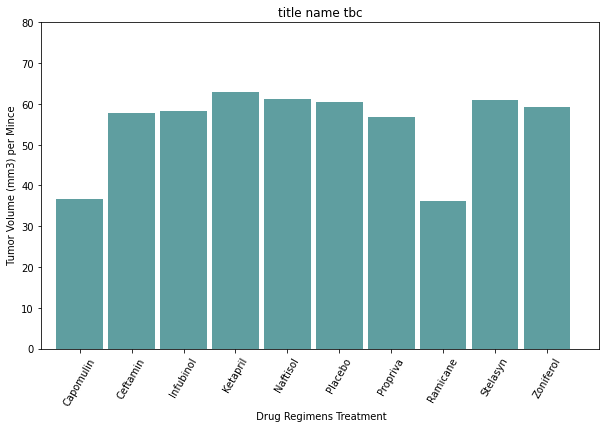

<Figure size 432x288 with 0 Axes>

In [15]:
# create the bar plot using pandas plot function and adjust format
mince_number_and_drug.plot(kind="bar",legend=False,width=0.9,figsize=(10,6),color='cadetblue',rot=60)

plt.title("title name tbc")
plt.xlabel(" Drug Regimens Treatment")
plt.ylabel(" Tumor Volume (mm3) per Mince")

plt.xlim(-0.75, len(summary_statistics_2_df),100)
plt.ylim(0,80)

plt.show()
plt.tight_layout()

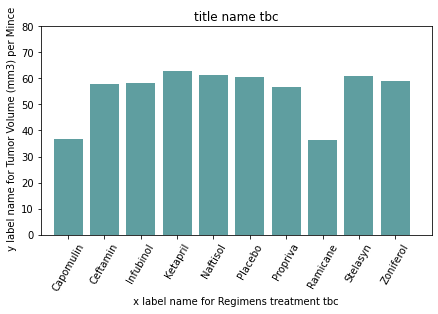

In [16]:
# Display total number of mice for each treatment throughout the course of the study using pyplot.

#Get x-axis and tick location )
x_axis = np.arange(len(mince_number_and_drug))
tick_locations = [value for value in x_axis]

#create the bar plot using pyplot function and adjust  format to much with the pandas
plt.bar(x_axis, mince_number_and_drug["mean"], color='cadetblue', alpha=1, align="center",)
plt.xticks(tick_locations, summary_statistics_2_df["Drug Regimen"], rotation=60)
plt.tight_layout()

plt.xlim(-0.75, len(x_axis),100)
plt.ylim(0, 80)
plt.rc('figure', figsize=(10,6))


plt.title("title name tbc")
plt.xlabel(" x label name for Regimens treatment tbc ")
plt.ylabel(" y label name for Tumor Volume (mm3) per Mince")

plt.show()


###
# # Split up our data into groups based upon 'Regimen'
# mouse_groups = clean_mouse_study_results_data_df.groupby(["Drug Regimen"])
# # count mouse per regiment
# drug_reg = mouse_groups["Mouse ID"].count()
# # Drop the 'stoptime' row that is contained within our group
# drug_reg = drug_reg.drop(drug_reg.index[3])
# final_chart = drug_reg.plot(kind="bar", title="title")
# final_chart

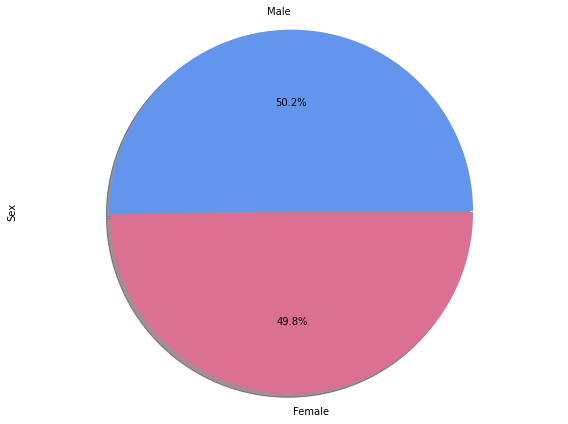

In [17]:
# Display a pie plot showing the distribution of female versus male mice using pandas

#create the pie plot using pandas plot function and adjust standard format
clean_mouse_study_results_data_df["Sex"].value_counts().plot(kind='pie', autopct='%1.1f%%',shadow=True, explode=(0,0.005),
     startangle=0,  fontsize=10, legend=False,figsize=(8,6),
     colors = ['cornflowerblue', 'palevioletred'] )


# plt.title("n/a")

plt.axis("equal")
plt.tight_layout()
plt.show()



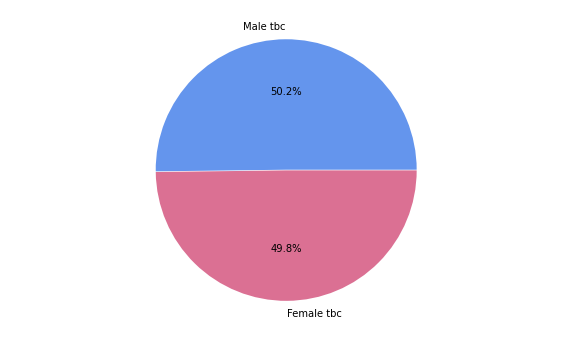

<Figure size 576x432 with 0 Axes>

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# plt.title("n/a")
labels = ["Male tbc", "Female tbc"]
male_and_female = clean_mouse_study_results_data_df[["Mouse ID","Sex"]]
male_and_female = male_and_female.set_index("Mouse ID")

males_fameles_count = male_and_female.value_counts()

colors = ['cornflowerblue', 'palevioletred']

explode = (0, 0.005)
plt.axis("equal")

#create the pie plot using pyplot function and adjust  format to much with the pandas
plt.pie(males_fameles_count,explode = explode, labels = labels, colors = colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.figure(figsize=(8, 6))


plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: # Capomulin, Ramicane, Infubinol, and Ceftamin

# Sort values for calculation
sorting_values = clean_mouse_study_results_data_df.sort_values(['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']).groupby('Mouse ID').head(4).set_index('Drug Regimen')
# sorting_values

#get the last (greatest) timepoint for each mouse for all treatment regimens and preview
timepoint_volume = sorting_values.nlargest(4, 'Timepoint',keep='all')
timepoint_volume_df = pd.DataFrame(timepoint_volume)
tumor_volume = timepoint_volume_df['Tumor Volume (mm3)']
tumor_volume_df= pd.DataFrame(tumor_volume)
tumor_volume_df  

#Get data for the four of the treatment regimens required and preview
selected_treatment_regimens = tumor_volume_df .loc[['Capomulin', 'Ramicane','Infubinol','Ceftamin'],:]
# selected_treatment_regimens

In [20]:
#Get IQR and print result
Q1 = selected_treatment_regimens['Tumor Volume (mm3)'].quantile(0.25)
Q3 = selected_treatment_regimens['Tumor Volume (mm3)'].quantile(0.75)
IQR = (Q3 - Q1)

interquartile_range = '{:,.2f}'.format(IQR)
print(f"The interquartile range is: {interquartile_range}")

The interquartile range is: 28.66


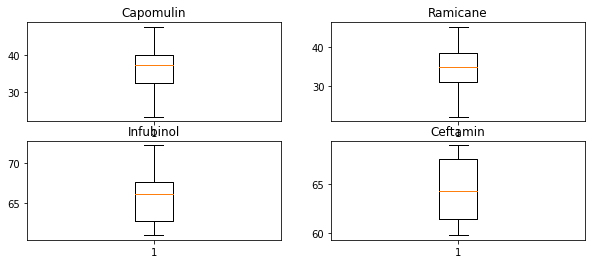

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Generate the plot data for each regimens 
selected_treatment = selected_treatment_regimens.reset_index()
selected_treatment.value_counts()

#Get data for each regimens and convert to list
Capomulin = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Capomulin']
Ramicane = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Ramicane']
Infubinol = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Infubinol']
Ceftamin = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Ceftamin']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,4))
ax1.boxplot(Capomulin['Tumor Volume (mm3)'])
ax1.set_title('Capomulin')
ax1.set_ylabel('')


ax2.boxplot(Ramicane['Tumor Volume (mm3)'])
ax2.set_title('Ramicane')
ax2.set_ylabel('')


ax3.boxplot(Infubinol['Tumor Volume (mm3)'])
ax3.set_title('Infubinol')
ax3.set_ylabel('')


ax4.boxplot(Ceftamin['Tumor Volume (mm3)'])
ax4.set_title('Ceftamin')
ax4.set_ylabel('')
plt.show()


#https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot


## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_vs_tumor_volume = timepoint_volume.loc[['Capomulin'],['Tumor Volume (mm3)','Timepoint']]
# Capomulin_tumor_volume.head()

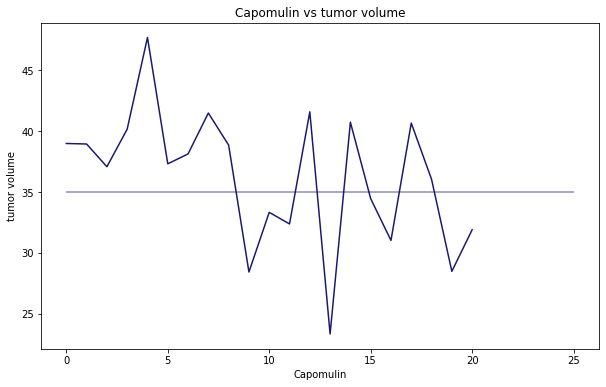

In [23]:
plt.title ("Capomulin vs tumor volume")
plt.xlabel("Capomulin")
plt.ylabel("tumor volume")
plt.hlines (35,0,25, color="midnightblue", alpha=0.5)
plt.rc('figure', figsize=(10,6))

x_axis = np.arange(len(Capomulin_vs_tumor_volume['Timepoint']))
# x_axis

y_axis = Capomulin_vs_tumor_volume['Tumor Volume (mm3)']
# y_axis
plt.plot(x_axis,y_axis, color = "midnightblue")


In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_mouse_weight = timepoint_volume.loc[['Capomulin'],['Tumor Volume (mm3)','Weight (g)']]
# Capomulin_mouse_weight.head()

In [25]:
mean_tumor_vol_cap = Capomulin_mouse_weight.groupby('Tumor Volume (mm3)').mean()
mean_tumor_vol_cap = mean_tumor_vol_cap.reset_index()
# mean_tumor_vol_cap.head()

In [26]:
# plt.title('Title name tbc')
# plt.xlabel('x label name for Mouse weight tbc')
# plt.ylabel("y label  name for Average tumor volume tbc" )

# plt.scatter(mean_tumor_vol_cap['Weight (g)'], mean_tumor_vol_cap['Tumor Volume (mm3)'])

# plt.show()

## Correlation and Regression

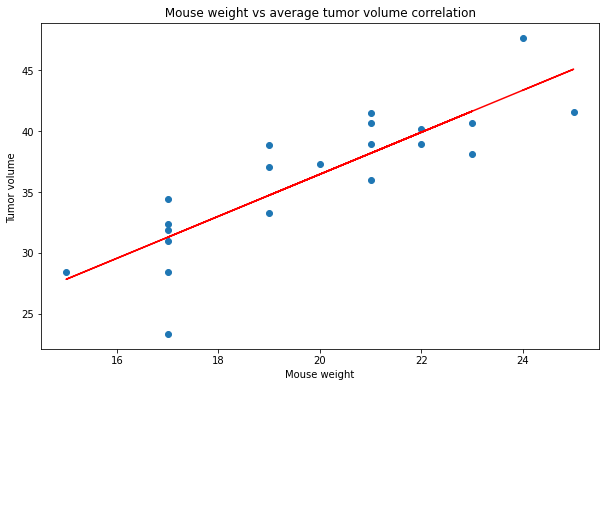

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.85


In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = mean_tumor_vol_cap['Weight (g)']
y_values = mean_tumor_vol_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="black")

plt.title(' Mouse weight vs average tumor volume correlation ')
plt.xlabel('Mouse weight')
plt.ylabel("Tumor volume " )
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(mean_tumor_vol_cap['Weight (g)'], mean_tumor_vol_cap['Tumor Volume (mm3)'])[0],2)}")